In [399]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import datetime
import psutil
import math
import seaborn as sns
from datetime import timedelta, datetime, tzinfo, timezone, time
from PIL import Image, ImageDraw
from numpy import asarray
from math import atan2,degrees,radians

In [2]:
def show_data():
    train_folder = [7554]#,7556,7557,7558,7559,7560,7561,7563,7569,7570,7571,7572,7573,7574]
    for j in train_folder:
        for i in range(1,22):
            url = r"train/"+str(j)+"/SimpleTest/"+str(i)+".csv"
            data = pd.read_csv(url)
            data.columns = data.columns.str.replace(' ', '')
            submit_time = data.iloc[-1][0]
            start_time = data.iloc[-2][0]
            data.dropna(inplace=True)
            data['X'] = data.X.astype(float)
            data.Time = data.Time.str.replace("00:","").astype(np.float64)
            
            fig=plt.figure(figsize=(20,5))

            ax= fig.add_subplot(1, 2, 1)
            ax.plot(data.Pressure,"#FF8000")
            ax.set_title("Pressure",fontdict={'fontsize': 20})

            ax2 = fig.add_subplot(1, 2, 2)
            ax2.plot(data.Time,c='b')
            ax2.set_title("Time",fontdict={'fontsize': 20})

            plt.show()
            hand_lifts = 0
            rolling_std = data.Time.rolling(window=20).std()

            for i in range(len(data.Time)-1):
                if (data.Time[i+1] > data.Time[i] + rolling_std[i]):
                    hand_lifts +=1

            print("Number of hand lifts: " + str(hand_lifts))

>  Notice that file number 22 does not exist (there is only an empty image), we will ignore this file.

In [651]:
data = pd.read_csv(r'train/7571/SimpleTest/4.csv')

In [652]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          490 non-null    object 
 1    Y         488 non-null    float64
 2    Pressure  488 non-null    float64
 3    TiltX     488 non-null    float64
 4    TiltY     488 non-null    float64
 5    Time      488 non-null    object 
dtypes: float64(4), object(2)
memory usage: 23.1+ KB


In [653]:
#remove the extra spaces in the columns.
print(data.columns)
data.columns = data.columns.str.replace(' ', '')
data.head(3)

Index(['X', ' Y', ' Pressure', ' TiltX', ' TiltY', ' Time'], dtype='object')


,X,Y,Pressure,TiltX,TiltY,Time
0,783.465,322.366667,0.151367,4877.0,9934.0,00:03.8730751
1,783.465,322.366667,0.159180,4877.0,9934.0,00:03.8730751
2,783.465,322.366667,0.161621,4877.0,9934.0,00:03.8886168


In [654]:
submit_time = data.iloc[-1][0]
start_time = data.iloc[-2][0]
data.dropna(inplace=True)
print(start_time)
print(submit_time)

total_time = float(submit_time[37:]) - float(start_time[38:])
print("Total time drawing: 00:" +str(total_time))

Time Elapsed till drawing started: 00:03.8730751
Time Elapsed till drawing submit: 00:19.2993790
Total time drawing: 00:15.426303899999999


In [655]:
data['X'] = data.X.astype(float)

In [656]:
# change the Time column to float
data.Time = data.Time.str.replace("00:","").astype(np.float64)

In [657]:
data.head(3)

,X,Y,Pressure,TiltX,TiltY,Time
0,783.465,322.366667,0.151367,4877.0,9934.0,3.873075
1,783.465,322.366667,0.159180,4877.0,9934.0,3.873075
2,783.465,322.366667,0.161621,4877.0,9934.0,3.888617


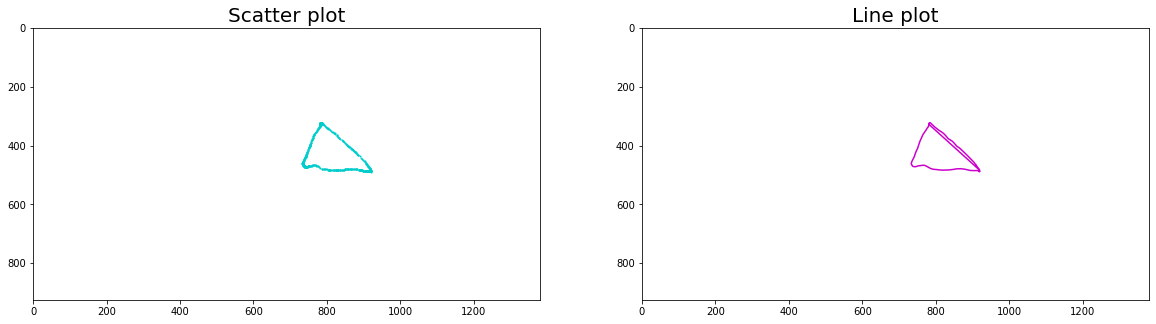

In [658]:
fig=plt.figure(figsize=(20,5))
ax= fig.add_subplot(1, 2, 1)

plt.gca().invert_yaxis()
ax.scatter(data.X,data.Y,s=1,c='#00CCCC')
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)
ax.set_title("Scatter plot",fontdict={'fontsize': 20})

ax2 = fig.add_subplot(1, 2, 2)
plt.gca().invert_yaxis()
ax2.plot(data.X,data.Y,"#CC00CC")
ax2.set_xbound(lower=0.0, upper=1381)
ax2.set_ybound(lower=0.0, upper=925)
ax2.set_title("Line plot",fontdict={'fontsize': 20})

plt.show()

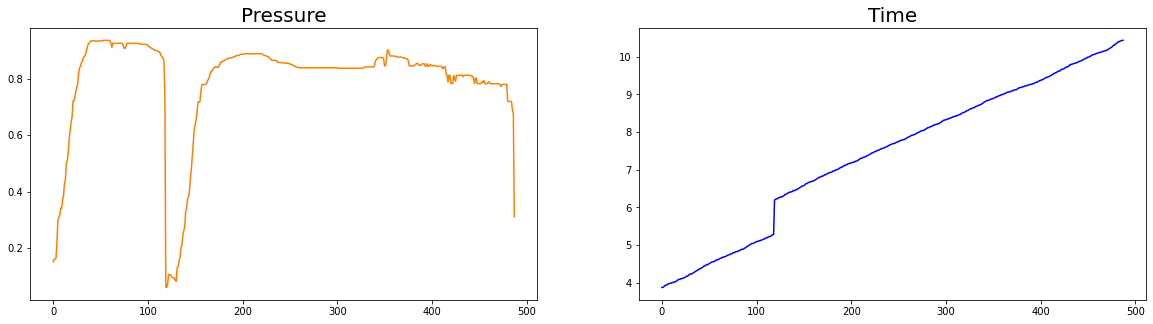

In [659]:
fig=plt.figure(figsize=(20,5))

ax= fig.add_subplot(1, 2, 1)
ax.plot(data.Pressure,"#FF8000")
ax.set_title("Pressure",fontdict={'fontsize': 20})

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(data.Time,c='b')
ax2.set_title("Time",fontdict={'fontsize': 20})

plt.show()

## *Hand lifts:*

In [660]:
hand_lifts = 0
rolling_std = data.Time.rolling(window=14).std()

for i in range(len(data.Time)-1):
    if (data.Time[i+1] > data.Time[i] + rolling_std[i]):
        hand_lifts +=1
        
print("Number of hand lifts: " + str(hand_lifts))

Number of hand lifts: 1


## *Number of lines:*

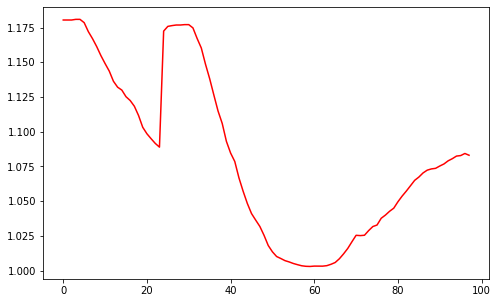

In [663]:
angels = [] 

for i in range(0,len(data.X),5):
    angels.append(math.atan2(data.X[i],data.Y[i]))
    #angels.append(degrees(angel))

angels = pd.Series(angels)

fig = plt.figure(figsize=(8, 5))
fig.add_subplot(1, 1, 1)
plt.plot(angels,"r")

In [669]:
numOfLines = 1
rolling_std = angels.rolling(window = 20).std()

for i in range(len(angels)-1):
    if (angels[i+1] > angels[i] + rolling_std[i]):
        numOfLines = numOfLines + 1

print("Number of lines: " + str(numOfLines))

Number of lines: 3


## *Open or closed shape:*
Only relevant for some of the drawings.

(3,4,8,11,13,16,17,19,20,21)

In [615]:
img = Image.open(r'train/7554/SimpleTest/3.PNG')
img = img.convert("RGB")
img = img.crop((0,220,1360,885))

In [616]:
target_pixel = (0,0)
target_color = (255,255,0)
ImageDraw.floodfill(img,target_pixel,target_color)#,thresh=0.5
im = asarray(img)

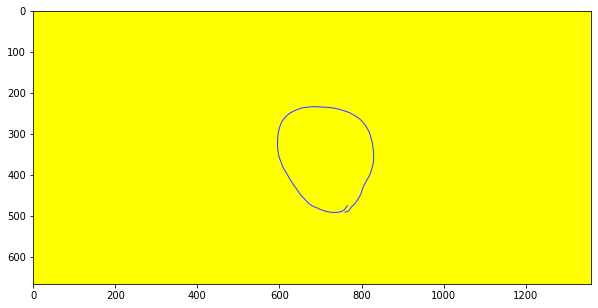

In [617]:
fig = plt.figure(figsize=(10, 7))
  
fig.add_subplot(1, 1, 1)
plt.imshow(img)


In [618]:
count =0 
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        for q in range(3):
            if ((im[i][j] == [255,255,255]).all() == True):
                count+=1
if count == 0:
    print ("Open Shape")
else: 
    print ("Close Shape")

Open Shape


<IPython.core.display.Javascript object>


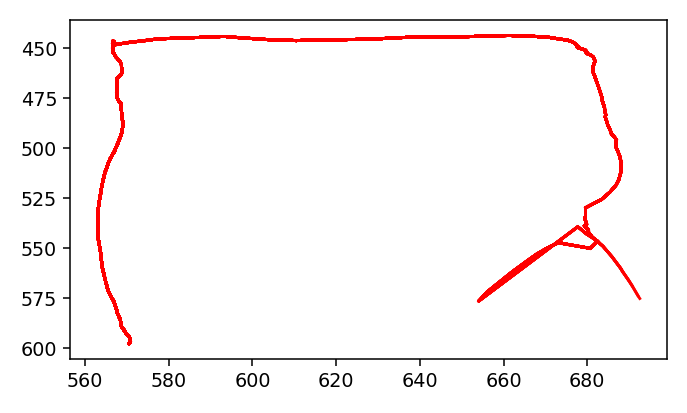

In [133]:
#import psutil
%matplotlib notebook

#plt.rcParams['animation.html'] = 'jshtml'

fig = plt.figure(figsize=(5,3),dpi=100)
ax = fig.add_subplot(111)
plt.gca().invert_yaxis()
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)
plt.tight_layout()
plt.show()


In [134]:
c=[]
d=[]
for i in range (len(data.X)):
    c.append(data.X[i])
    d.append(data.Y[i])
    plt.tight_layout()
    ax.plot(c,d , color='r')
    fig.canvas.draw() 
plt.close()


<IPython.core.display.Javascript object>


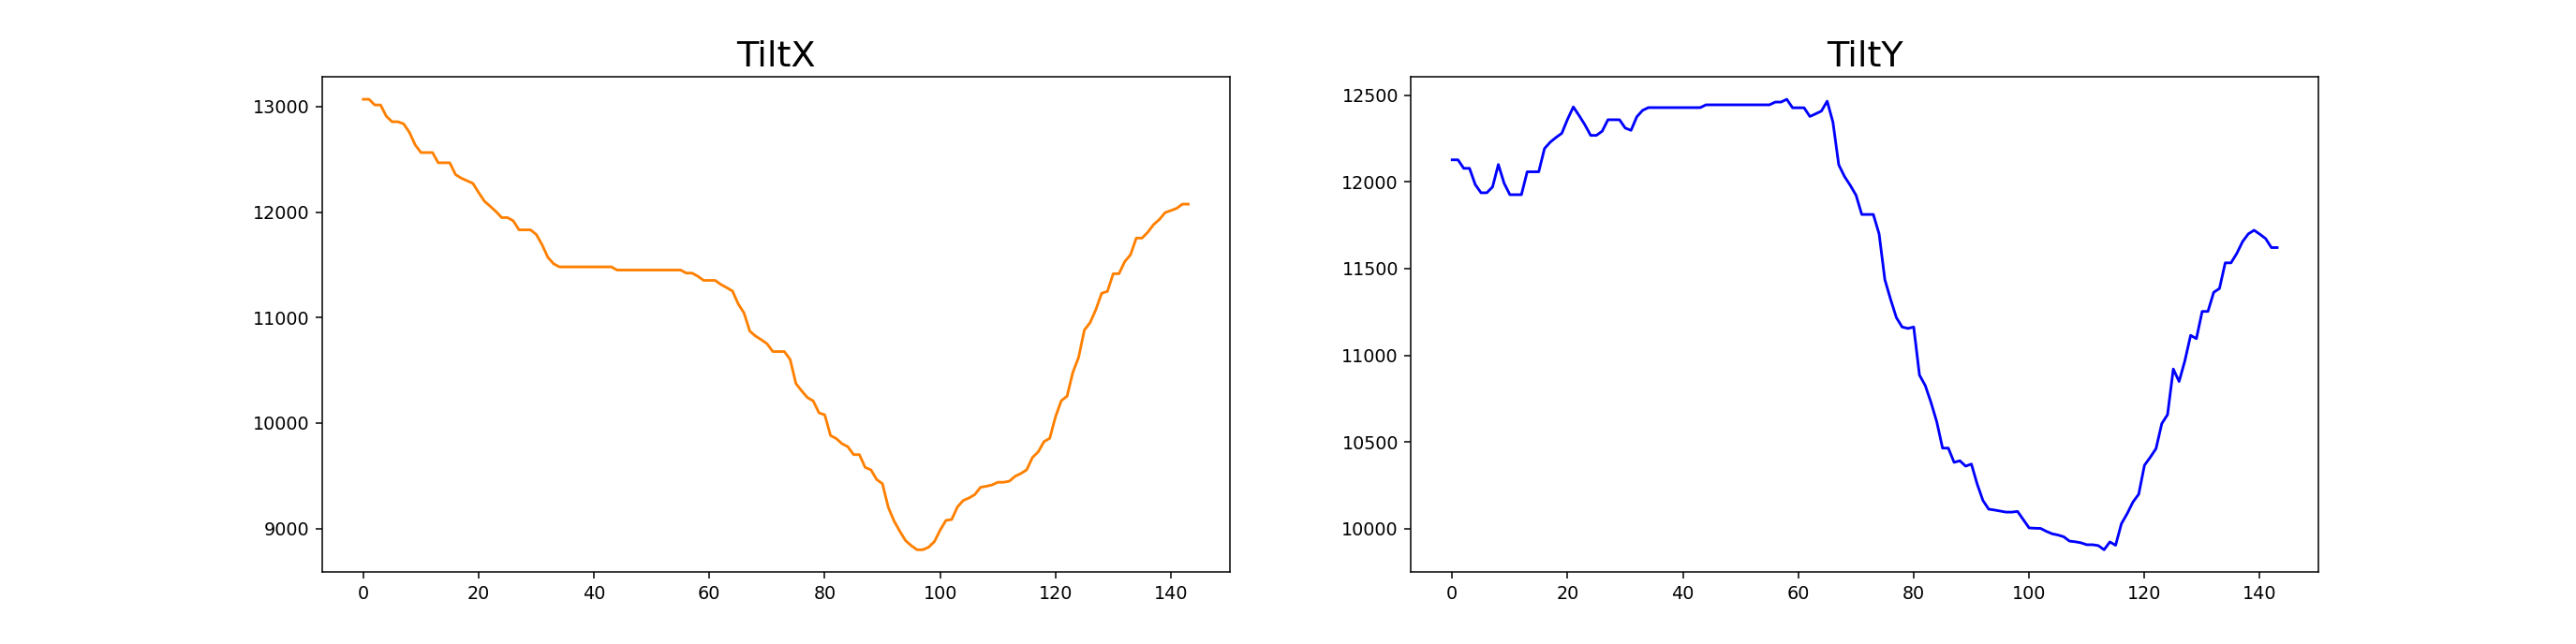

In [31]:
fig=plt.figure(figsize=(20,5))

ax= fig.add_subplot(1, 2, 1)
ax.plot(data.TiltX,"#FF8000")
ax.set_title("TiltX",fontdict={'fontsize': 20})

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(data.TiltY,c='b')
ax2.set_title("TiltY",fontdict={'fontsize': 20})

plt.show()